In [6]:
import numpy as np
import os

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [8]:
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
tf.__version__

'2.3.0'

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [12]:
X_train_full.shape

(60000, 28, 28)

In [13]:
y_train_full.shape

(60000,)

In [14]:
X_train_full


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [15]:
y_train_full


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [17]:
X_valid.shape

(5000, 28, 28)

In [18]:
X_train.shape

(55000, 28, 28)

In [19]:
X_test.shape

(10000, 28, 28)

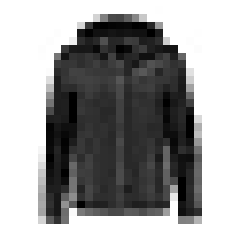

In [20]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [21]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [22]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [23]:
class_names[y_train[0]]

'Coat'

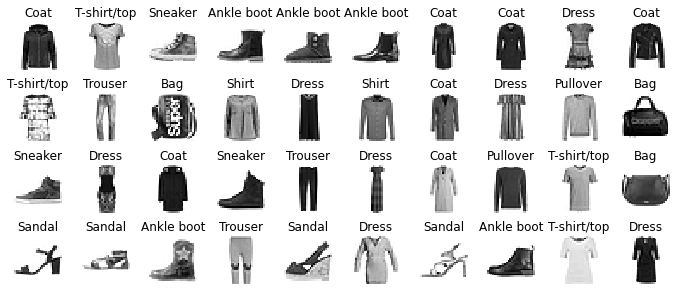

In [24]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

**Construct a Model**

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [26]:
keras.backend.clear_session()
np.random.seed(42)

In [27]:
model.layers

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [30]:
model.get_layer(hidden1.name) is hidden1

True

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
weights

array([[ 0.0364569 ,  0.03627741,  0.03187288, ...,  0.01602468,
         0.01306392, -0.00744849],
       [-0.00277438,  0.05538841, -0.00758689, ..., -0.05766007,
         0.04335733, -0.00995416],
       [ 0.03535362,  0.0211264 ,  0.00886439, ...,  0.03941532,
         0.06462306, -0.00460675],
       ...,
       [ 0.00715332, -0.05246249,  0.04861414, ..., -0.04576035,
         0.01757804, -0.03229747],
       [-0.0325769 ,  0.0325518 , -0.00647339, ..., -0.05179187,
         0.07408252,  0.01200326],
       [ 0.07056767,  0.02900093, -0.07394991, ...,  0.02985183,
        -0.0283138 , -0.05452618]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [37]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7105 - accuracy: 0.7693 - val_loss: 0.4915 - val_accuracy: 0.8332
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4859 - accuracy: 0.8305 - val_loss: 0.4413 - val_accuracy: 0.8546
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4410 - accuracy: 0.8454 - val_loss: 0.4126 - val_accuracy: 0.8612
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4149 - accuracy: 0.8550 - val_loss: 0.4142 - val_accuracy: 0.8582
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3954 - accuracy: 0.8603 - val_loss: 0.3810 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3794 - accuracy: 0.8666 - val_loss: 0.3810 - val_accuracy: 0.8668
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3664 - accuracy: 0.8709 - val_loss: 0.3622 - val_accuracy:

In [38]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [39]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plot learning Curves**

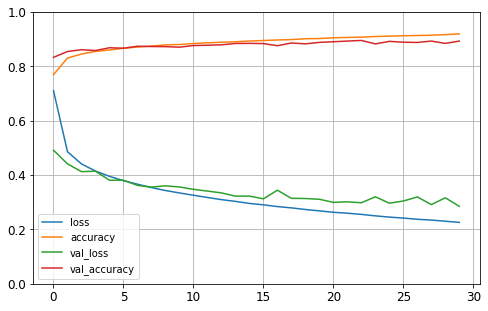

In [41]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3240 - accuracy: 0.8831


[0.32396915555000305, 0.8830999732017517]

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(6)

array([[1.00000e-06, 0.00000e+00, 3.80000e-05, 1.00000e-06, 1.00000e-06,
        6.01400e-03, 1.00000e-05, 1.36840e-02, 3.62000e-04, 9.79889e-01],
       [1.30000e-05, 0.00000e+00, 9.99545e-01, 0.00000e+00, 3.41000e-04,
        0.00000e+00, 1.01000e-04, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [5.00000e-06, 9.99995e-01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]],
      dtype=float32)

In [44]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

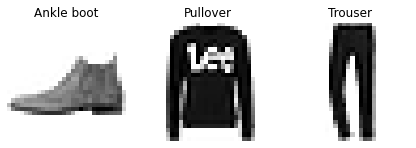

In [45]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**EXERCICE**

**1) Plot Learning curves when using different optimizers**




optimizers: Adam

In [46]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [47]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3729 - accuracy: 0.8644 - val_loss: 0.3389 - val_accuracy: 0.8750
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3296 - accuracy: 0.8776 - val_loss: 0.3459 - val_accuracy: 0.8740
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3071 - accuracy: 0.8863 - val_loss: 0.3297 - val_accuracy: 0.8784
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2889 - accuracy: 0.8927 - val_loss: 0.3435 - val_accuracy: 0.8786
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2765 - accuracy: 0.8963 - val_loss: 0.3134 - val_accuracy: 0.8862
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2601 - accuracy: 0.9020 - val_loss: 0.3216 - val_accuracy: 0.8896
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2482 - accuracy: 0.9069 - val_loss: 0.3041 - val_accuracy:

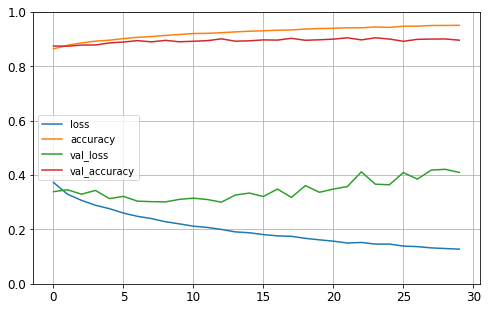

In [48]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [49]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.8933


[0.4493940472602844, 0.8932999968528748]

optimizers:RMSprop

In [50]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [51]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1265 - accuracy: 0.9531 - val_loss: 0.5144 - val_accuracy: 0.8978
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1335 - accuracy: 0.9515 - val_loss: 0.5787 - val_accuracy: 0.9000
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1411 - accuracy: 0.9496 - val_loss: 0.6483 - val_accuracy: 0.8930
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1506 - accuracy: 0.9481 - val_loss: 0.6721 - val_accuracy: 0.8880
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1545 - accuracy: 0.9473 - val_loss: 0.6528 - val_accuracy: 0.8890
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1570 - accuracy: 0.9466 - val_loss: 0.6504 - val_accuracy: 0.8978
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1617 - accuracy: 0.9459 - val_loss: 0.7738 - val_accuracy:

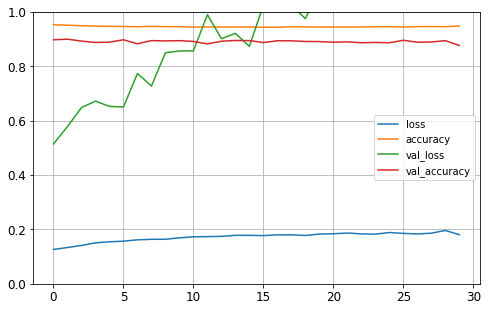

In [52]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [53]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.2042 - accuracy: 0.8771


[1.2041831016540527, 0.8770999908447266]

optimizers:SGD

In [54]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="SGD",
              metrics=["accuracy"])

In [55]:
history3 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 5.3817 - accuracy: 0.2874 - val_loss: 1.7478 - val_accuracy: 0.3078
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.5516 - accuracy: 0.4211 - val_loss: 1.1867 - val_accuracy: 0.5774
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.1918 - accuracy: 0.5639 - val_loss: 1.1506 - val_accuracy: 0.5834
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.8917 - accuracy: 0.6426 - val_loss: 0.8743 - val_accuracy: 0.6716
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7316 - accuracy: 0.7213 - val_loss: 1.3704 - val_accuracy: 0.4572
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7281 - accuracy: 0.7369 - val_loss: 0.7677 - val_accuracy: 0.7224
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6291 - accuracy: 0.7767 - val_loss: 0.5886 - val_accuracy:

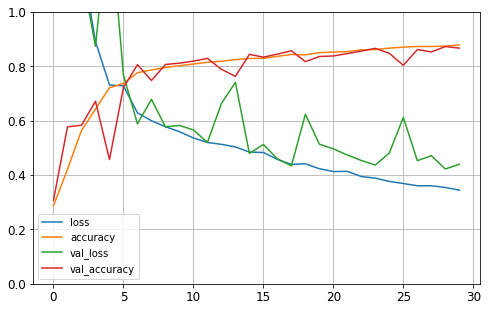

In [56]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [57]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy: 0.8559


[0.478648841381073, 0.85589998960495]

**2) Plot Learning curves when using different batch size**

batch-size=10


In [58]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [59]:
history4 = model.fit(X_train, y_train, batch_size=10, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.3105 - accuracy: 0.8893 - val_loss: 0.3805 - val_accuracy: 0.8818
Epoch 2/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.2654 - accuracy: 0.9058 - val_loss: 0.3699 - val_accuracy: 0.8836
Epoch 3/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.2442 - accuracy: 0.9119 - val_loss: 0.3569 - val_accuracy: 0.8872
Epoch 4/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.2300 - accuracy: 0.9169 - val_loss: 0.3655 - val_accuracy: 0.8920
Epoch 5/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.2196 - accuracy: 0.9213 - val_loss: 0.3959 - val_accuracy: 0.8892
Epoch 6/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.2091 - accuracy: 0.9243 - val_loss: 0.4281 - val_accuracy: 0.8742
Epoch 7/30
5500/5500 [==============================] - 13s 2ms/step - loss: 0.2031 - accuracy: 0.9251 - val_loss: 0.3676 - val_ac

In [60]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5816 - accuracy: 0.8879


[0.5816402435302734, 0.8878999948501587]

batch-size=20

In [61]:
history5 = model.fit(X_train, y_train, batch_size=20, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
2750/2750 [==============================] - 9s 3ms/step - loss: 0.0958 - accuracy: 0.9658 - val_loss: 0.5577 - val_accuracy: 0.8970
Epoch 2/30
2750/2750 [==============================] - 9s 3ms/step - loss: 0.0985 - accuracy: 0.9646 - val_loss: 0.5899 - val_accuracy: 0.8906
Epoch 3/30
2750/2750 [==============================] - 9s 3ms/step - loss: 0.0958 - accuracy: 0.9655 - val_loss: 0.6593 - val_accuracy: 0.8958
Epoch 4/30
2750/2750 [==============================] - 9s 3ms/step - loss: 0.0922 - accuracy: 0.9666 - val_loss: 0.6222 - val_accuracy: 0.8970
Epoch 5/30
2750/2750 [==============================] - 9s 3ms/step - loss: 0.0945 - accuracy: 0.9667 - val_loss: 0.6435 - val_accuracy: 0.8982
Epoch 6/30
2750/2750 [==============================] - 9s 3ms/step - loss: 0.0898 - accuracy: 0.9673 - val_loss: 0.6182 - val_accuracy: 0.8948
Epoch 7/30
2750/2750 [==============================] - 9s 3ms/step - loss: 0.0895 - accuracy: 0.9680 - val_loss: 0.7004 - val_accuracy:

In [62]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8813 - accuracy: 0.8862


[0.8813232183456421, 0.8862000107765198]

In [63]:
history6 = model.fit(X_train, y_train, batch_size=30, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0492 - accuracy: 0.9821 - val_loss: 0.8627 - val_accuracy: 0.8992
Epoch 2/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0524 - accuracy: 0.9808 - val_loss: 0.8744 - val_accuracy: 0.8968
Epoch 3/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0558 - accuracy: 0.9797 - val_loss: 0.9463 - val_accuracy: 0.8998
Epoch 4/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0562 - accuracy: 0.9799 - val_loss: 0.8925 - val_accuracy: 0.8932
Epoch 5/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0534 - accuracy: 0.9811 - val_loss: 0.9071 - val_accuracy: 0.8962
Epoch 6/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0512 - accuracy: 0.9815 - val_loss: 0.8991 - val_accuracy: 0.8968
Epoch 7/30
1834/1834 [==============================] - 7s 4ms/step - loss: 0.0520 - accuracy: 0.9813 - val_loss: 0.8830 - val_accuracy:

In [64]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1296 - accuracy: 0.8881


[1.129576325416565, 0.8881000280380249]

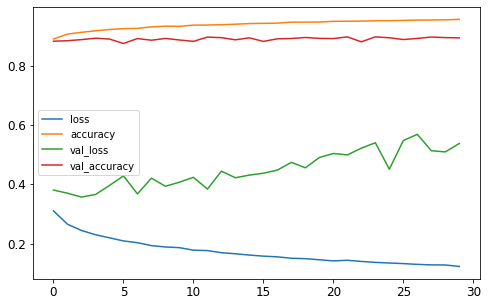

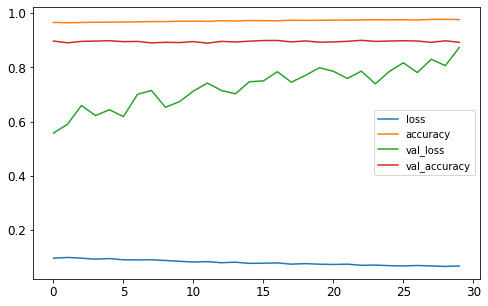

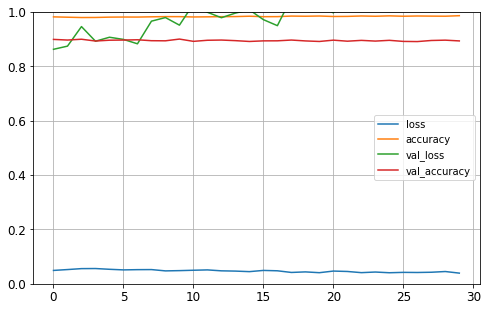

In [65]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
pd.DataFrame(history5.history).plot(figsize=(8, 5))
pd.DataFrame(history6.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


**3) Plot Learning curves when using different number of epochs**

epochs=10


In [66]:
history7 = model.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0354 - accuracy: 0.9869 - val_loss: 1.1877 - val_accuracy: 0.8936
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0390 - accuracy: 0.9866 - val_loss: 1.2247 - val_accuracy: 0.8920
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0369 - accuracy: 0.9870 - val_loss: 1.1929 - val_accuracy: 0.8942
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0356 - accuracy: 0.9869 - val_loss: 1.2191 - val_accuracy: 0.8894
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0387 - accuracy: 0.9859 - val_loss: 1.1253 - val_accuracy: 0.8890
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0409 - accuracy: 0.9864 - val_loss: 1.2518 - val_accuracy: 0.8892
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0355 - accuracy: 0.9876 - val_loss: 1.2109 - val_accuracy:

In [67]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2213 - accuracy: 0.8848


[1.2213256359100342, 0.8848000168800354]

In [68]:
history8 = model.fit(X_train, y_train, batch_size=32, epochs=40,
                    validation_data=(X_valid, y_valid))

Epoch 1/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0406 - accuracy: 0.9871 - val_loss: 1.2231 - val_accuracy: 0.8970
Epoch 2/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0363 - accuracy: 0.9870 - val_loss: 1.2236 - val_accuracy: 0.8914
Epoch 3/40
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0336 - accuracy: 0.9882 - val_loss: 1.2771 - val_accuracy: 0.8868
Epoch 4/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0335 - accuracy: 0.9885 - val_loss: 1.3081 - val_accuracy: 0.8858
Epoch 5/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0368 - accuracy: 0.9868 - val_loss: 1.2784 - val_accuracy: 0.8902
Epoch 6/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0318 - accuracy: 0.9886 - val_loss: 1.3194 - val_accuracy: 0.8860
Epoch 7/40
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0324 - accuracy: 0.9892 - val_loss: 1.3127 - val_accuracy:

In [69]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6211 - accuracy: 0.8849


[1.6210861206054688, 0.8848999738693237]

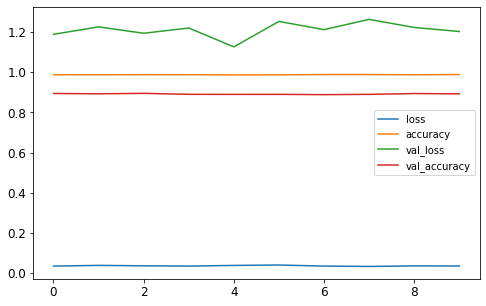

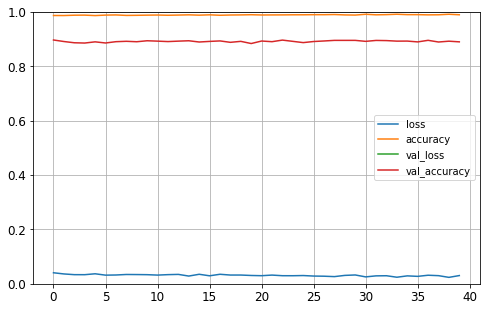

In [70]:
pd.DataFrame(history7.history).plot(figsize=(8, 5))
pd.DataFrame(history8.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**4) repeat with more layers**

In [71]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(150, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(80, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [72]:
model.layers

In [73]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [74]:
history9 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0780 - accuracy: 0.6053 - val_loss: 0.5936 - val_accuracy: 0.7858
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7113 - accuracy: 0.7409 - val_loss: 0.4983 - val_accuracy: 0.8266
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6278 - accuracy: 0.7766 - val_loss: 0.4447 - val_accuracy: 0.8432
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5736 - accuracy: 0.7957 - val_loss: 0.4210 - val_accuracy: 0.8492
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5502 - accuracy: 0.8059 - val_loss: 0.4099 - val_accuracy: 0.8510
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5248 - accuracy: 0.8123 - val_loss: 0.3983 - val_accuracy: 0.8514
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5036 - accuracy: 0.8200 - val_loss: 0.3804 - val_accuracy:

In [75]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.8724


[0.35688623785972595, 0.8723999857902527]

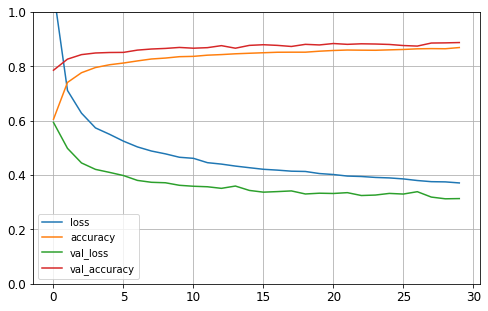

In [76]:
pd.DataFrame(history9.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**5) apply on different datasets**

In [77]:
data = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [78]:
X_train_full.shape

(60000, 28, 28)

In [79]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [80]:
X_valid, X_train = X_train_full[:10000] / 255., X_train_full[10000:] / 255.
y_valid, y_train = y_train_full[:10000], y_train_full[10000:]
X_test = X_test / 255.

In [81]:
class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

In [82]:
class_names[y_train[0]]

'3'

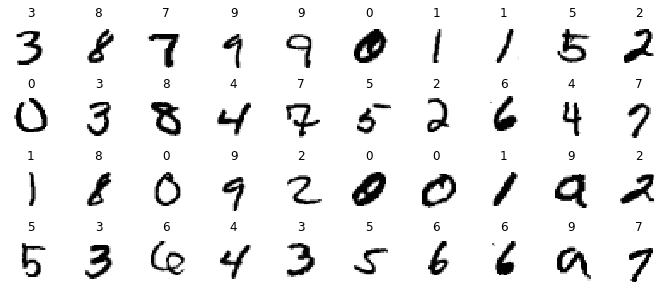

In [83]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

In [84]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="softmax"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [85]:
keras.backend.clear_session()
np.random.seed(42)

In [86]:
model.layers

In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [88]:
hidden1 = model.layers[3]
hidden1.name

'dense_6'

In [89]:
model.get_layer(hidden1.name) is hidden1

True

In [90]:
weights, biases = hidden1.get_weights()

In [91]:
weights

array([[ 0.08508184, -0.03005674, -0.07281831, ..., -0.00209665,
         0.09302671,  0.08041842],
       [-0.03035205, -0.02964479,  0.04843751, ...,  0.0417384 ,
         0.09733037, -0.05916403],
       [ 0.03443622, -0.0273703 ,  0.10771843, ...,  0.04809173,
         0.03133286,  0.03076813],
       ...,
       [-0.08751504, -0.08207779, -0.01394136, ...,  0.10872794,
        -0.0403028 ,  0.08670718],
       [ 0.05000167,  0.06715459, -0.09248263, ..., -0.0482133 ,
        -0.04743427, -0.06005158],
       [ 0.02827857, -0.00587998, -0.03881721, ..., -0.07681224,
        -0.02141247, -0.06599581]], dtype=float32)

In [92]:
weights.shape

(300, 200)

In [93]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [94]:
biases.shape

(200,)

In [95]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [96]:
history10 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3439 - accuracy: 0.9001 - val_loss: 0.1473 - val_accuracy: 0.9577
Epoch 2/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1999 - accuracy: 0.9417 - val_loss: 0.1273 - val_accuracy: 0.9624
Epoch 3/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1687 - accuracy: 0.9533 - val_loss: 0.1291 - val_accuracy: 0.9637
Epoch 4/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1515 - accuracy: 0.9586 - val_loss: 0.1055 - val_accuracy: 0.9722
Epoch 5/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1401 - accuracy: 0.9620 - val_loss: 0.1112 - val_accuracy: 0.9707
Epoch 6/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1325 - accuracy: 0.9644 - val_loss: 0.0916 - val_accuracy: 0.9751
Epoch 7/30
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1250 - accuracy: 0.9667 - val_loss: 0.0904 - val_accuracy:

In [97]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9793


[0.11086271703243256, 0.9793000221252441]

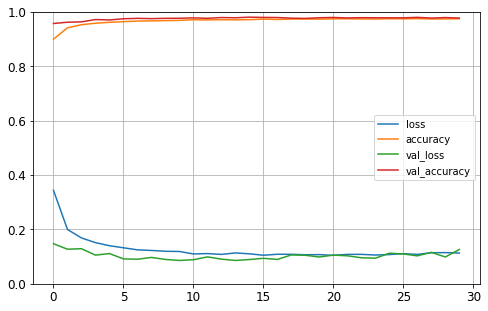

In [98]:
pd.DataFrame(history10.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
